In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("occupancy_data/datatest2.txt")

# Stats

In [3]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [4]:
df.median()

Temperature       20.790000
Humidity          30.200000
Light              0.000000
CO2              639.000000
HumidityRatio      0.004593
Occupancy          0.000000
dtype: float64

In [10]:
# class composition
count_0 = 0
count_1 = 1
for value in df['Occupancy']:
    if value == 0:
        count_0 += 1
    elif value == 1:
        count_1 += 1
    else:
        print("Ahem") #just checking for anomalous values
print("Class 0: " +  str(count_0))
print("Percentage of whole df: " + str(round(count_0/df.index.size*100, 2)) + "%")
print("Class 1: " + str(count_1))
print("Percentage of whole df: " + str(round(count_1/df.index.size*100, 2)) + "%")

Class 0: 7703
Percentage of whole df: 78.99%
Class 1: 2050
Percentage of whole df: 21.02%


In [16]:
df.groupby('Occupancy').aggregate(['min',np.median, 'mean'])
  

Temperature                   Humidity                   Light  \
                  min median       mean      min median       mean   min   
Occupancy                                                                  
0           19.500000  20.60  20.727111  21.8650  30.29  30.070832   0.0   
1           20.463333  21.89  22.034313  22.0225  29.00  29.219272   0.0   

                                     CO2                     HumidityRatio  \
          median        mean         min  median        mean           min   
Occupancy                                                                    
0            0.0   24.861612  484.666667  587.50  713.095202      0.003275   
1          447.0  492.264251  519.000000  894.75  904.087953      0.003298   

                               
             median      mean  
Occupancy                      
0          0.004546  0.004537  
1          0.004763  0.004785

In [3]:
# attribute statistics broken down according to class label

for attribute in df.columns:
    print("\n"+ str(attribute).upper())
    print(df.groupby('Occupancy')[attribute].describe())
    print("\n")


DATE
          count unique                  top freq
Occupancy                                       
0          7703   7703  2015-02-12 04:07:00    1
1          2049   2049  2015-02-17 16:11:00    1



TEMPERATURE
            count       mean       std        min   25%    50%        75%  \
Occupancy                                                                   
0          7703.0  20.727111  0.890278  19.500000  20.1  20.60  20.926667   
1          2049.0  22.034313  0.793204  20.463333  21.5  21.89  22.200000   

             max  
Occupancy         
0          24.39  
1          24.39  



HUMIDITY
            count       mean       std      min   25%    50%    75%        max
Occupancy                                                                     
0          7703.0  30.070832  4.112721  21.8650  26.5  30.29  33.09  39.500000
1          2049.0  29.219272  3.195316  22.0225  27.1  29.00  31.50  34.733333



LIGHT
            count        mean         std  min    25%    50% 

<b> Pairwise correlations </b>

In [3]:
# correlation
df.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.472921,0.705538,0.199646,-0.010407,0.521767
Humidity,-0.472921,1.000000,-0.187477,-0.079224,0.884104,-0.087768
Light,0.705538,-0.187477,1.000000,0.190213,0.162681,0.914525
CO2,0.199646,-0.079224,0.190213,1.000000,0.043197,0.261908
HumidityRatio,-0.010407,0.884104,0.162681,0.043197,1.000000,0.190161
Occupancy,0.521767,-0.087768,0.914525,0.261908,0.190161,1.000000


# Data visualisation

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

(array([193., 101., 269., 402., 968., 248., 408., 766., 966., 392., 693.,
        514., 463., 313., 220., 181., 253., 421., 198., 342., 178., 173.,
        167.,  48.,  38.,  81.,  58.,  46.,  46.,  39.,  37.,  51.,  50.,
         35.,  45., 144.,  72.,  55.,  48.,  30.]),
 array([19.5    , 19.62225, 19.7445 , 19.86675, 19.989  , 20.11125,
        20.2335 , 20.35575, 20.478  , 20.60025, 20.7225 , 20.84475,
        20.967  , 21.08925, 21.2115 , 21.33375, 21.456  , 21.57825,
        21.7005 , 21.82275, 21.945  , 22.06725, 22.1895 , 22.31175,
        22.434  , 22.55625, 22.6785 , 22.80075, 22.923  , 23.04525,
        23.1675 , 23.28975, 23.412  , 23.53425, 23.6565 , 23.77875,
        23.901  , 24.02325, 24.1455 , 24.26775, 24.39   ]),
 <a list of 40 Patch objects>)

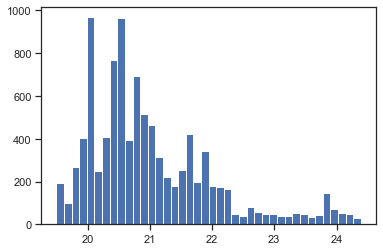

In [8]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['Temperature'], bins = 40)



(array([7.231e+03, 3.820e+02, 1.613e+03, 2.370e+02, 2.210e+02, 6.400e+01,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([   0. ,  158.1,  316.2,  474.3,  632.4,  790.5,  948.6, 1106.7,
        1264.8, 1422.9, 1581. ]),
 <a list of 10 Patch objects>)

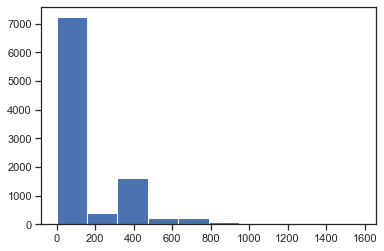

In [9]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['Light'])



(array([4.931e+03, 2.108e+03, 1.013e+03, 4.050e+02, 3.100e+02, 3.110e+02,
        5.940e+02, 6.300e+01, 1.300e+01, 4.000e+00]),
 array([ 484.66666667,  643.85      ,  803.03333333,  962.21666667,
        1121.4       , 1280.58333333, 1439.76666667, 1598.95      ,
        1758.13333333, 1917.31666667, 2076.5       ]),
 <a list of 10 Patch objects>)

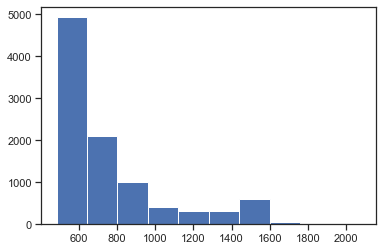

In [10]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['CO2'])



(array([ 195.,  539.,  976.,  958., 1658., 1650., 1428., 1467.,  599.,
         282.]),
 array([0.00327476, 0.00352415, 0.00377353, 0.00402292, 0.0042723 ,
        0.00452169, 0.00477107, 0.00502046, 0.00526984, 0.00551922,
        0.00576861]),
 <a list of 10 Patch objects>)

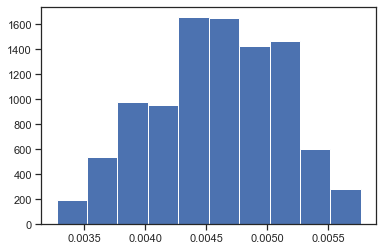

In [11]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['HumidityRatio'])



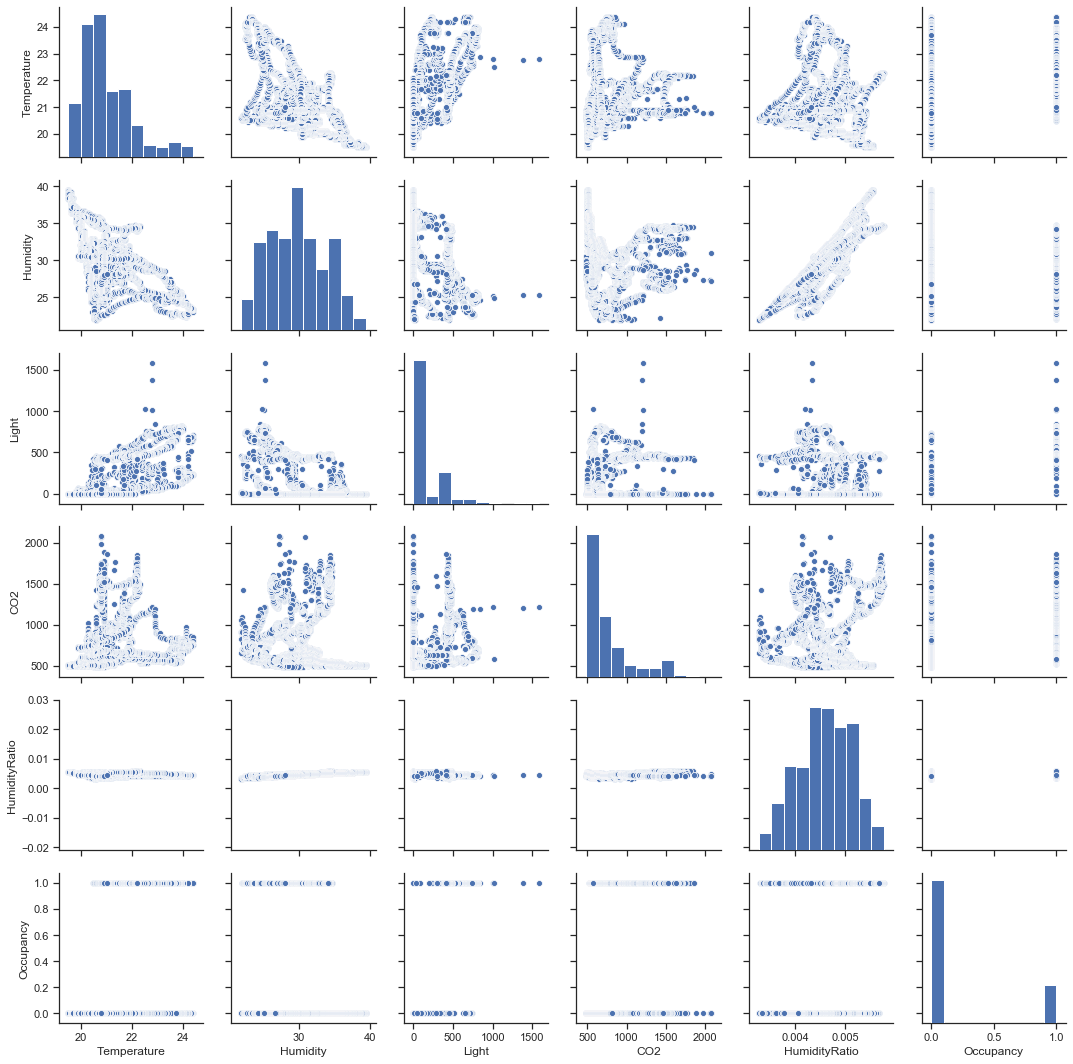

In [12]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)



Text(0, 0.5, 'Count')

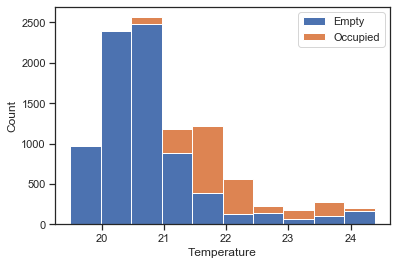

In [13]:
df1 = df[df['Occupancy'] == 0]['Temperature']
df2 = df[df['Occupancy'] == 1]['Temperature']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Temperature')
ax.set_ylabel('Count')



Text(0, 0.5, 'Count')

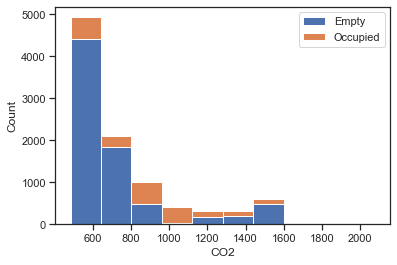

In [14]:
df1 = df[df['Occupancy'] == 0]['CO2']
df2 = df[df['Occupancy'] == 1]['CO2']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('CO2')
ax.set_ylabel('Count')



Text(0, 0.5, 'Count')

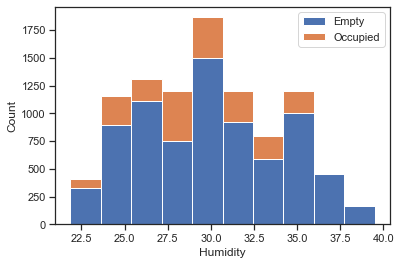

In [15]:
df1 = df[df['Occupancy'] == 0]['Humidity']
df2 = df[df['Occupancy'] == 1]['Humidity']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Humidity')
ax.set_ylabel('Count')



Text(0, 0.5, 'Count')

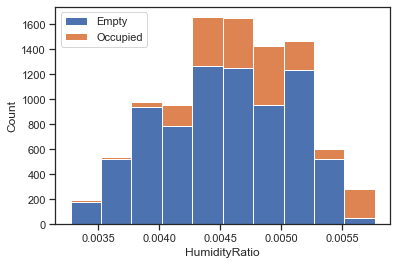

In [16]:
df1 = df[df['Occupancy'] == 0]['HumidityRatio']
df2 = df[df['Occupancy'] == 1]['HumidityRatio']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('HumidityRatio')
ax.set_ylabel('Count')



Text(0, 0.5, 'Count')

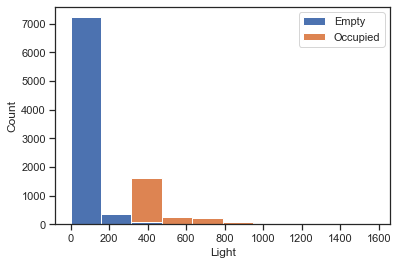

In [17]:
df1 = df[df['Occupancy'] == 0]['Light']
df2 = df[df['Occupancy'] == 1]['Light']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], bins = 10, stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Light')
ax.set_ylabel('Count')

<b> Outliers </b>

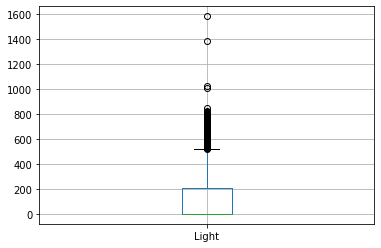

In [6]:
boxplot = df.boxplot(column= ['Light'])

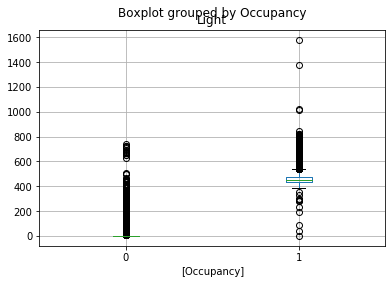

In [11]:
boxplot = df.boxplot(column= ['Light'], by = ['Occupancy'])

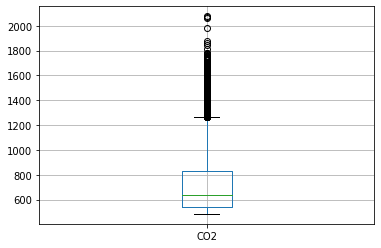

In [7]:
boxplot = df.boxplot(column= ['CO2'])

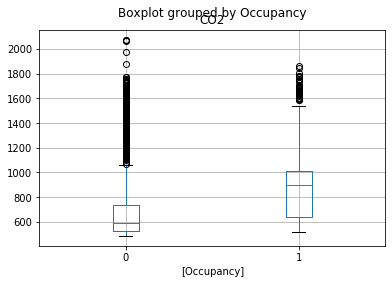

In [12]:
boxplot = df.boxplot(column= ['CO2'], by = ['Occupancy'])

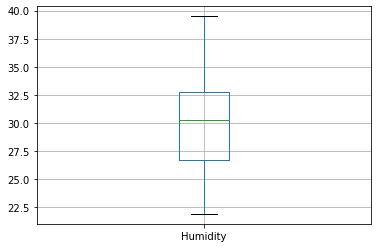

In [8]:
boxplot = df.boxplot(column= ['Humidity'])

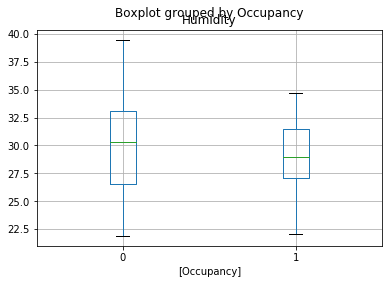

In [13]:
boxplot = df.boxplot(column= ['Humidity'], by = ['Occupancy'])

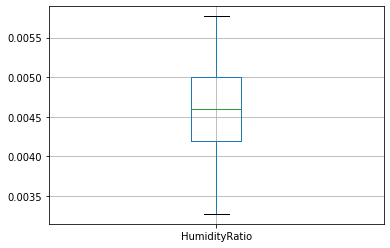

In [9]:
boxplot = df.boxplot(column= ['HumidityRatio'])

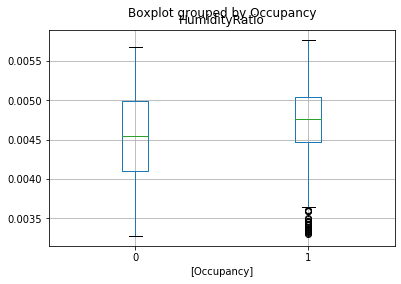

In [14]:
boxplot = df.boxplot(column= ['HumidityRatio'], by = ['Occupancy'])

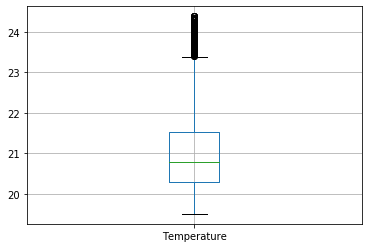

In [10]:
boxplot = df.boxplot(column= ['Temperature'])

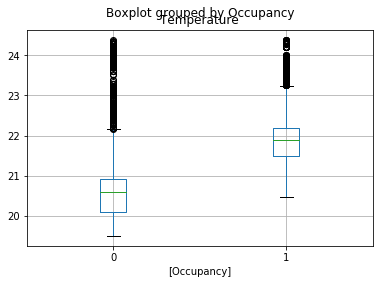

In [15]:
boxplot = df.boxplot(column= ['Temperature'], by = ['Occupancy'])